# Nyasha Nhunduru C19136083Y




# Predicting the life expectancy of African countries using Regression

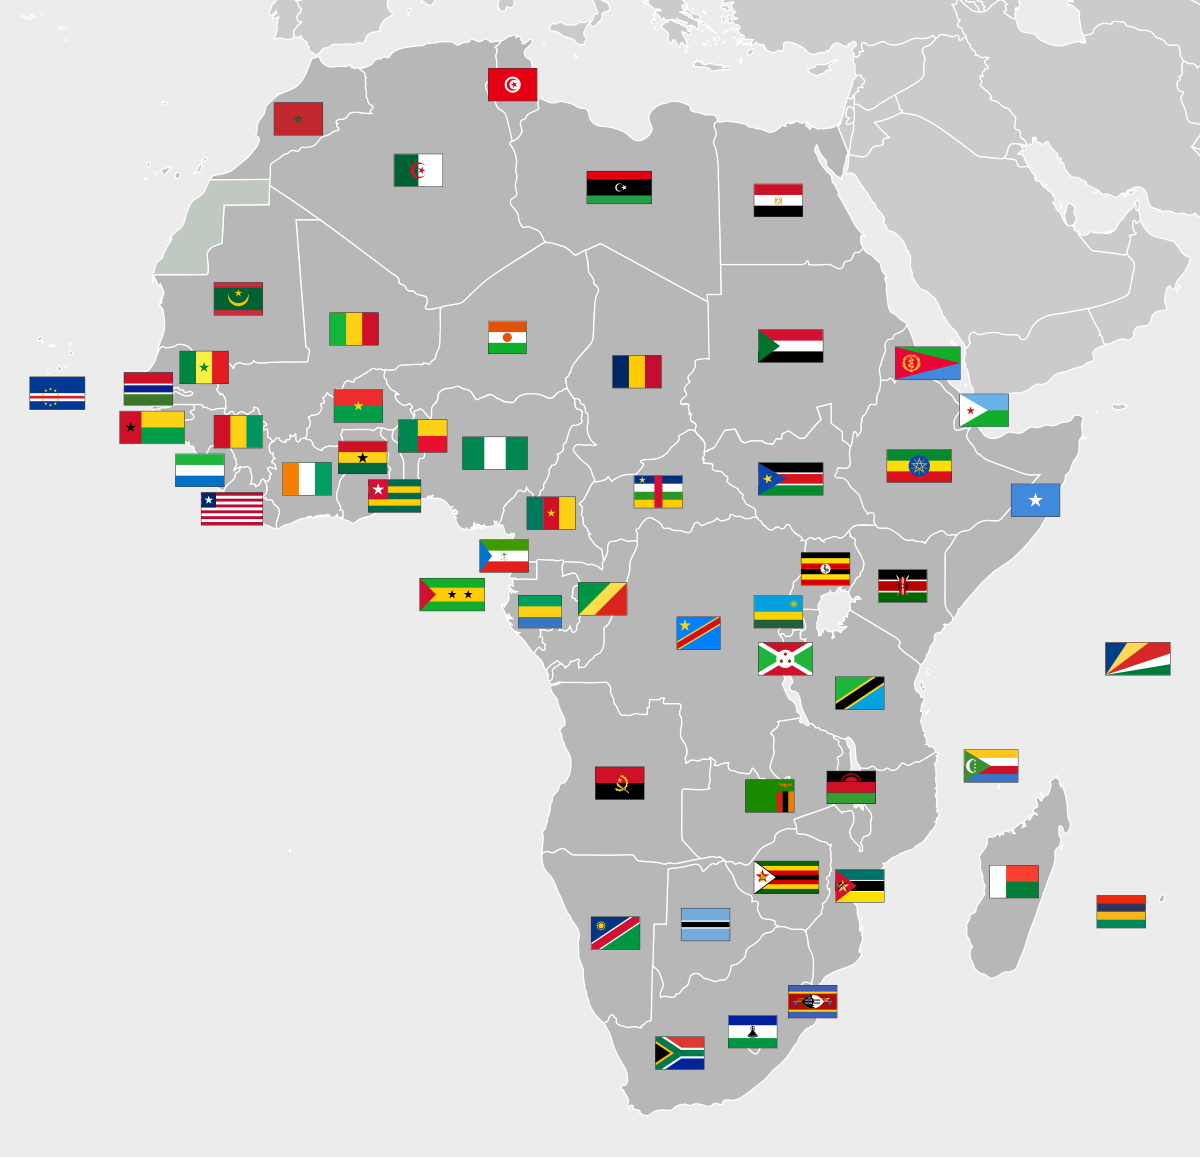

Life expectancy varies widely across the globe.This project is aimed at creating a machine learning model which can be used for the predictive analysis of life expectancy in African Countries.The project used Linear Regression and regularized linear regression algorithms; Ridge Regression , Lasso Regression and ElasticNet Regression.

The WHO life expectancy dataset was used and the data was collected over a time period of 2000 to 2015.The dataset showed life expectancy for 48 African countries and it had 20 features .

# Description of features

1. Country- Country 
2. Year-Year 
3. Status- Developed or Developing status
4. Life Expectancy-Age(years) 
5. Adult Mortality-Adult Mortality Rates of both sexes(probability of dying between 15&60 years per 1000 population) 
6. Infant Deaths- Number of Infant Deaths per 1000 population 
7. Alcohol-Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol) 
8. Percent Expenditure- Expenditure on health as a percentage of Gross Domestic Product per capita(%) 
9. Hep B- Hepatitis B (HepB) immunization coverage among 1-year-olds(%) 
10. Measles- number of reported measles cases per 1000 population 
11. BMI-Average Body Mass Index of entire population U-5 
12.  U-5 Deaths- Number of under-five deaths per 1000 population 
13. Polio- Polio(Pol3) immunization coverage among 1-year-olds(%) 
14. Total Expenditure- General government expenditure on health as a percentage of total government expenditure(%) 
15. Diphtheria- Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds(%) 
16. HIV/AIDS- Deaths per 1000 live births HIV/AIDS(0-4 years) 
17. GDP- Gross Domestic Product per capita(in USD) 
18. Population- Population                                                                                                      19. Thinness 10-19- Prevalence of thinness among children and adolescents for Age 10 to 19                                     20. Thinness 5-9(%)- Prevalence of thinness among children for Age 5 to 9(%) 
21. Income Composition-Human Development Index in terms of income composition of resources(0-1) 
22. Schooling- Number of years of Schooling

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer, OneHotEncoder
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin


In [245]:
data= pd.read_csv('African Countries Life Expectancy Dataset.csv')
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Algeria,2015,Developing,75.6,19,21,NaN,0.000000,95.0,63,...,95.0,NaN,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4
1,Algeria,2014,Developing,75.4,11,21,0.01,54.237318,95.0,0,...,95.0,7.21,95.0,0.1,547.851700,39113313.0,6.0,5.8,0.741,14.4
2,Algeria,2013,Developing,75.3,112,21,0.53,544.450743,95.0,25,...,95.0,7.12,95.0,0.1,5471.866766,38338562.0,5.9,5.8,0.737,14.4
3,Algeria,2012,Developing,75.1,113,21,0.66,555.926083,95.0,18,...,95.0,6.14,95.0,0.1,5564.825660,37565847.0,5.9,5.8,0.732,14.4
4,Algeria,2011,Developing,74.9,116,21,0.56,509.002041,95.0,112,...,95.0,5.29,95.0,0.1,5432.252300,36819558.0,5.9,5.8,0.724,14.0


# Explaratory Data Analysis

In [246]:
data=data.drop("Year", axis =  1)
data.head()

,Country,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Algeria,Developing,75.6,19,21,NaN,0.000000,95.0,63,59.5,...,95.0,NaN,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4
1,Algeria,Developing,75.4,11,21,0.01,54.237318,95.0,0,58.4,...,95.0,7.21,95.0,0.1,547.851700,39113313.0,6.0,5.8,0.741,14.4
2,Algeria,Developing,75.3,112,21,0.53,544.450743,95.0,25,57.2,...,95.0,7.12,95.0,0.1,5471.866766,38338562.0,5.9,5.8,0.737,14.4
3,Algeria,Developing,75.1,113,21,0.66,555.926083,95.0,18,56.1,...,95.0,6.14,95.0,0.1,5564.825660,37565847.0,5.9,5.8,0.732,14.4
4,Algeria,Developing,74.9,116,21,0.56,509.002041,95.0,112,55.0,...,95.0,5.29,95.0,0.1,5432.252300,36819558.0,5.9,5.8,0.724,14.0


In [247]:
data=data.drop("Status", axis =  1)
data.head()

,Country,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Algeria,75.6,19,21,NaN,0.000000,95.0,63,59.5,24,95.0,NaN,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4
1,Algeria,75.4,11,21,0.01,54.237318,95.0,0,58.4,24,95.0,7.21,95.0,0.1,547.851700,39113313.0,6.0,5.8,0.741,14.4
2,Algeria,75.3,112,21,0.53,544.450743,95.0,25,57.2,24,95.0,7.12,95.0,0.1,5471.866766,38338562.0,5.9,5.8,0.737,14.4
3,Algeria,75.1,113,21,0.66,555.926083,95.0,18,56.1,24,95.0,6.14,95.0,0.1,5564.825660,37565847.0,5.9,5.8,0.732,14.4
4,Algeria,74.9,116,21,0.56,509.002041,95.0,112,55.0,24,95.0,5.29,95.0,0.1,5432.252300,36819558.0,5.9,5.8,0.724,14.0


In [248]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 20 columns):
Country                            768 non-null object
Life expectancy                    768 non-null float64
Adult Mortality                    768 non-null int64
infant deaths                      768 non-null int64
Alcohol                            705 non-null float64
percentage expenditure             768 non-null float64
Hepatitis B                        560 non-null float64
Measles                            768 non-null int64
 BMI                               736 non-null float64
under-five deaths                  768 non-null int64
Polio                              757 non-null float64
Total expenditure                  693 non-null float64
Diphtheria                         757 non-null float64
 HIV/AIDS                          768 non-null float64
GDP                                706 non-null float64
Population                         700 non-null float64
 thinnes

In [249]:
data.describe()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,768.000000,768.000000,768.000000,705.000000,768.000000,560.000000,768.000000,736.000000,768.000000,757.000000,693.000000,757.000000,768.000000,706.000000,7.000000e+02,736.000000,736.000000,752.000000,752.000000
mean,59.251693,258.602865,41.063802,2.656312,115.618012,76.594643,3453.326823,23.629755,63.908854,71.829590,5.464343,71.162483,4.839062,1568.476049,8.876935e+06,7.240217,7.170924,0.462774,9.232048
std,8.061530,154.911523,79.982526,2.926878,219.317202,25.823849,14362.840227,13.220453,127.290056,26.882239,2.135535,28.061134,7.296918,2720.285634,1.937376e+07,2.726327,2.781933,0.166164,2.993548
min,39.000000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,2.000000,0.000000,3.000000,1.120000,2.000000,0.100000,5.668726,8.460000e+02,1.000000,1.000000,0.000000,0.000000
25%,53.600000,145.750000,3.000000,0.230000,5.647459,72.000000,4.000000,16.600000,5.000000,61.000000,4.170000,59.000000,0.600000,248.585828,3.872590e+05,6.100000,6.100000,0.394000,7.300000
50%,58.150000,272.000000,25.000000,1.340000,36.037123,86.000000,128.500000,21.450000,39.000000,79.000000,5.190000,81.000000,2.200000,545.962702,1.710862e+06,7.400000,7.300000,0.455000,9.600000
75%,63.850000,349.500000,49.000000,4.500000,94.164116,95.000000,1191.500000,28.000000,79.000000,94.000000,6.540000,94.000000,5.100000,1381.298924,9.740479e+06,8.700000,8.600000,0.569000,11.300000
max,79.000000,723.000000,576.000000,11.890000,1705.678619,99.000000,212183.000000,64.800000,943.000000,99.000000,14.390000,99.000000,43.500000,22742.381590,1.811817e+08,16.300000,19.100000,0.781000,16.000000


In [250]:
data.shape

(768, 20)

In [251]:
data.columns

Index(['Country', 'Life expectancy ', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

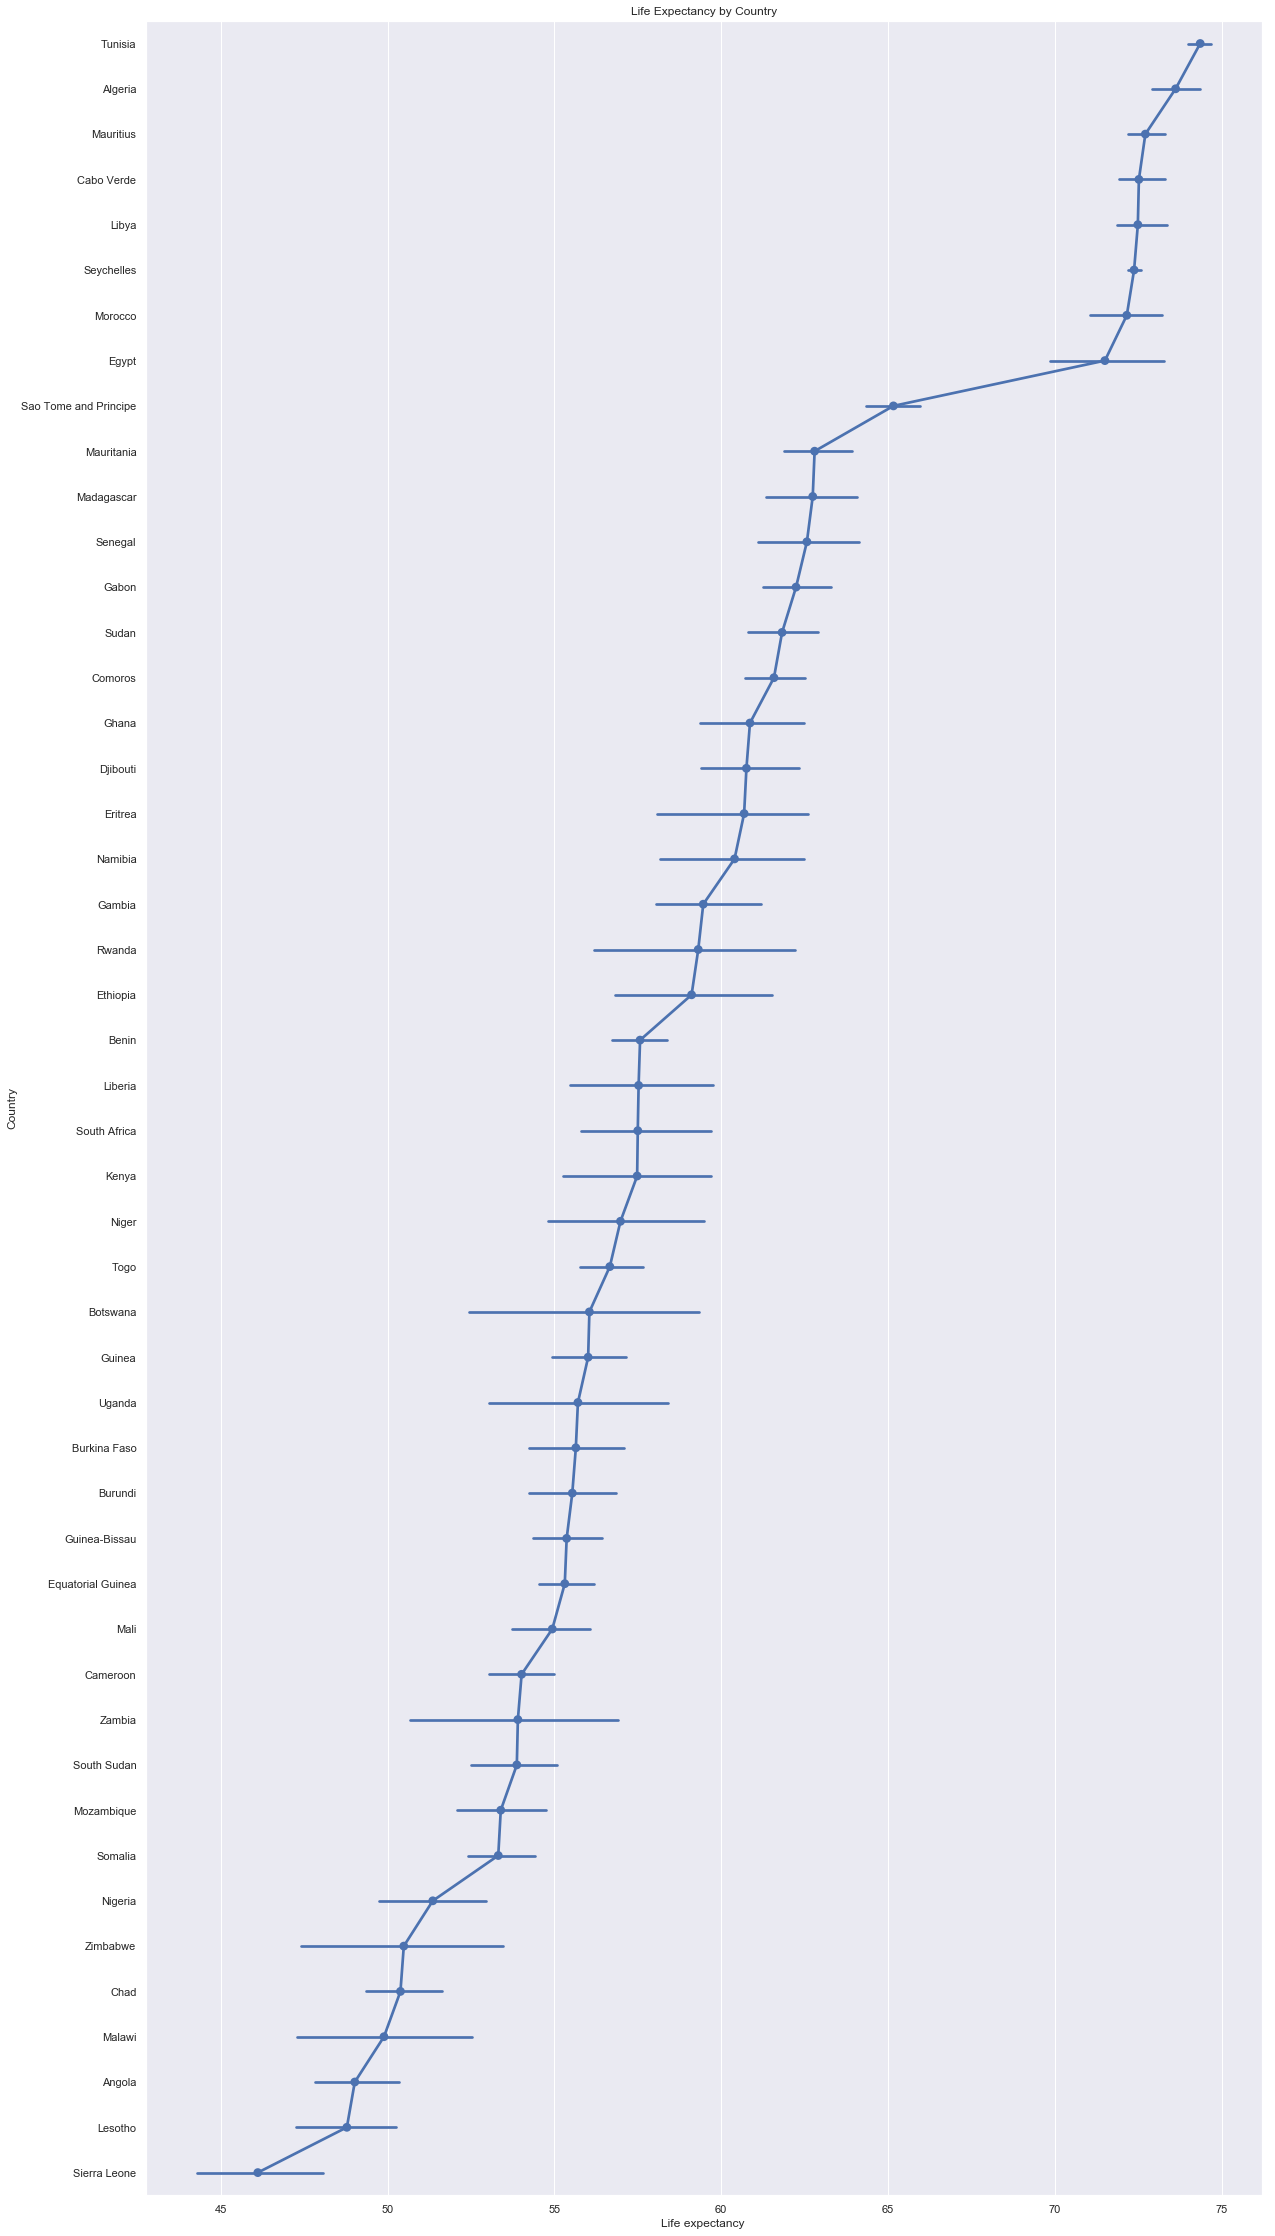

In [253]:
LE=data.groupby(data["Country"])['Life expectancy '].mean().sort_values(kind="quicksort",ascending=False)
sns.pointplot(y="Country",x='Life expectancy ',data=data,order=LE.index,join=True)
plt.title( 'Life Expectancy by Country')
sns.set(rc={'figure.figsize':(20,40)})
plt.show()

In [254]:
data=data.groupby("Country").mean()
data.head()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Country,,,,,,,,,,,,,,,,,,,
Algeria,73.61875,108.1875,20.3125,0.406667,236.185241,78.000000,1943.8750,48.74375,23.5000,91.7500,4.604000,91.8750,0.10000,2847.853392,2.164983e+07,6.09375,5.97500,0.694875,12.71250
Angola,49.01875,328.5625,83.7500,5.740667,102.100268,70.222222,3561.3125,18.01875,132.6250,46.1250,3.919333,47.6875,2.36875,1975.143045,1.014710e+07,6.19375,6.66875,0.458375,8.04375
Benin,57.56875,269.3750,25.0000,1.000000,43.991956,62.571429,1116.8750,19.61250,39.2500,67.6875,4.636000,67.9375,1.70625,561.167968,3.942979e+06,8.25000,8.13750,0.438062,8.85000
Botswana,56.05000,448.1250,2.0000,4.670000,334.266971,87.312500,237.8750,32.24375,3.1250,96.1875,5.510667,95.8125,16.52500,4498.285431,1.063867e+06,7.43750,7.81250,0.630375,12.13750
Burkina Faso,55.64375,252.5000,44.7500,4.241333,52.045581,81.100000,5091.7500,15.50000,79.9375,69.0000,6.038000,77.3125,1.83750,410.372034,6.143695e+06,7.41875,6.98125,0.229688,5.40625


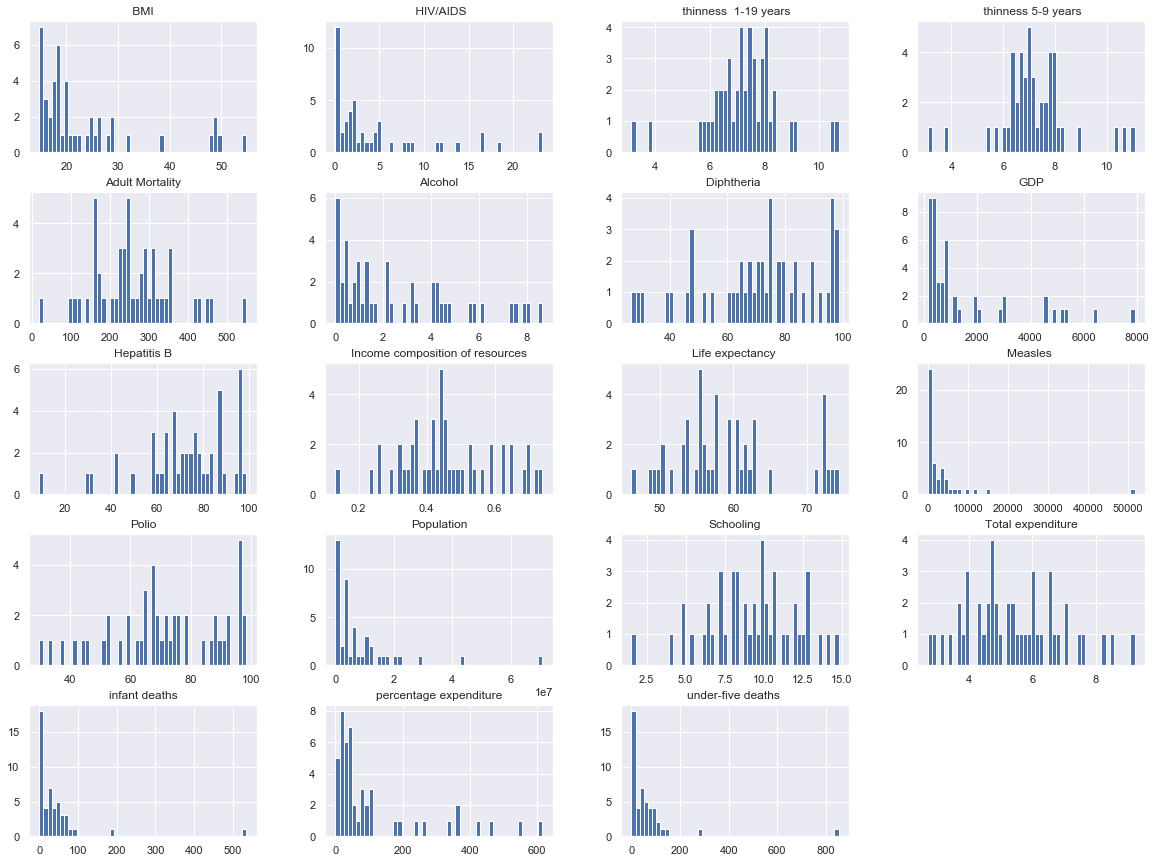

In [255]:
data.hist(bins=50, figsize=([20,15]))
plt.show()

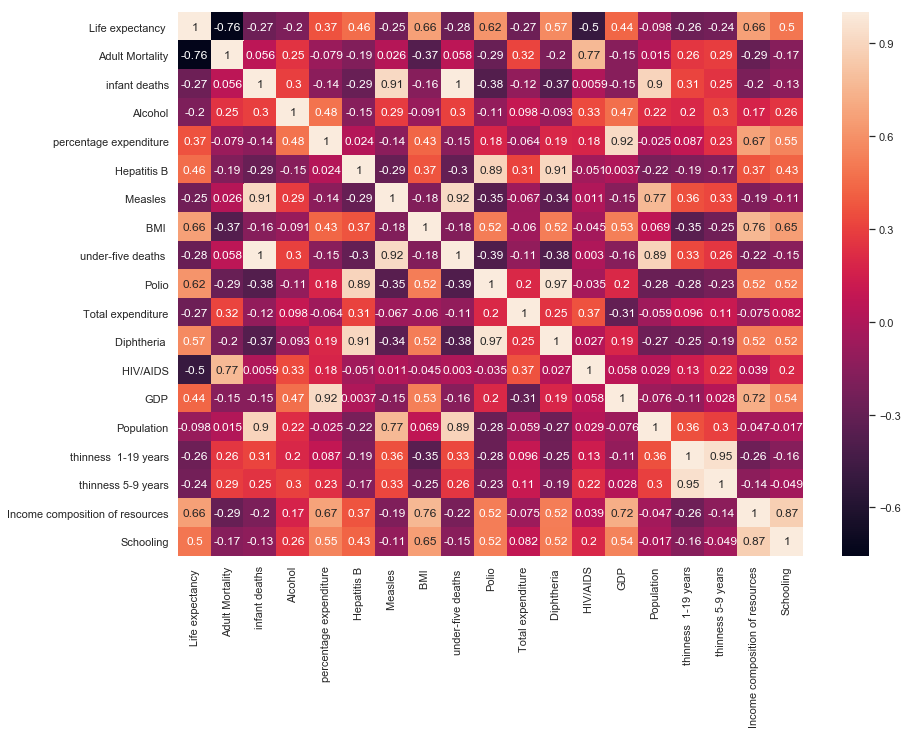

In [256]:
plt.figure(figsize = (14, 10))
sns.heatmap(data.corr(), annot = True)


<function matplotlib.pyplot.show(*args, **kw)>

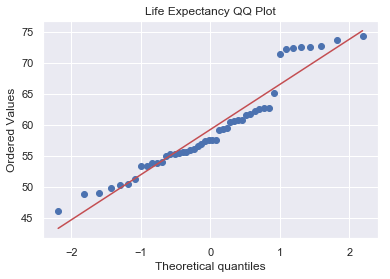

In [257]:
%matplotlib inline
stats.probplot(data['Life expectancy '],dist= "norm", plot=plt)
plt.title('Life Expectancy QQ Plot')
plt.show

# Preprocessing the data

In [258]:
data.isna().sum().sum()

16

In [259]:
data.isnull().sum(axis=0)

Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            1
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               2
under-five deaths                  0
Polio                              0
Total expenditure                  1
Diphtheria                         0
 HIV/AIDS                          0
GDP                                2
Population                         4
 thinness  1-19 years              2
 thinness 5-9 years                2
Income composition of resources    1
Schooling                          1
dtype: int64

In [260]:
data_labels = data['Life expectancy ']
data_features =data.drop('Life expectancy ', axis = 1)
data_features.isnull().head()

,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Country,,,,,,,,,,,,,,,,,,
Algeria,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Angola,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Benin,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Botswana,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Burkina Faso,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [261]:
data_features.isnull().sum()

Adult Mortality                    0
infant deaths                      0
Alcohol                            1
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               2
under-five deaths                  0
Polio                              0
Total expenditure                  1
Diphtheria                         0
 HIV/AIDS                          0
GDP                                2
Population                         4
 thinness  1-19 years              2
 thinness 5-9 years                2
Income composition of resources    1
Schooling                          1
dtype: int64

In [262]:
data_labels.isnull().sum()

0

In [263]:
data_features.fillna(value = data_features.mean(), inplace = True)

In [264]:
data_labels.fillna(value = data_labels.mean(), inplace = True)

In [265]:
min_max_scaler = MinMaxScaler()
data_features = min_max_scaler.fit_transform(data_features)

In [266]:
data_features

array([[1.68333137e-01, 3.79185626e-02, 4.59282130e-02, 3.83193876e-01,
        7.69337979e-01, 3.76326587e-02, 8.47988775e-01, 2.75801364e-02,
        9.01728844e-01, 2.91026429e-01, 9.07585004e-01, 0.00000000e+00,
        3.49025018e-01, 3.04852695e-01, 3.91914191e-01, 3.62500000e-01,
        9.24584445e-01, 8.43072573e-01],
       [5.83107870e-01, 1.56341150e-01, 6.63527596e-01, 1.65650476e-01,
        6.82617112e-01, 6.89456152e-02, 8.15403804e-02, 1.55651727e-01,
        2.37488626e-01, 1.85822577e-01, 2.91194420e-01, 9.79492715e-02,
        2.36628905e-01, 1.42420250e-01, 4.05115512e-01, 4.49218750e-01,
        5.36322594e-01, 4.91046183e-01],
       [4.71709211e-01, 4.66690001e-02, 1.14627557e-01, 7.13738430e-02,
        5.97312096e-01, 2.16222626e-02, 1.21297162e-01, 4.60646960e-02,
        5.51410373e-01, 2.95943454e-01, 5.73670445e-01, 6.93470049e-02,
        5.45234647e-02, 5.48105621e-02, 6.76567657e-01, 6.32812500e-01,
        5.02975580e-01, 5.51837889e-01],
       [8.081

In [267]:
data_features_train, data_features_test, data_labels_train, data_labels_test = train_test_split(
        data_features, data_labels, train_size = 0.7, test_size = 0.3)

#  Linear Regression

In [268]:

linear_model = LinearRegression()
linear_model.fit(data_features_train, data_labels_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [269]:
print('R_square score on the training: %.2f' % linear_model.score(data_features_train, data_labels_train))

R_square score on the training: 0.95


In [270]:
linear_model_predict = linear_model.predict(data_features_test)

In [271]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print('Coefficients: \n', linear_model.coef_)
print("Mean squared error: %.2f"
      % mean_squared_error(data_labels_test, linear_model_predict))
print("Mean absolute error: %.2f"
      % mean_absolute_error(data_labels_test, linear_model_predict))
print('R_square score: %.2f' % r2_score(data_labels_test, linear_model_predict))

Coefficients: 
 [  -5.07195966  224.64774852   -0.96913011    5.6205319    -4.85313554
   19.46680015    7.28196445 -250.30929854    1.59081194   -0.54102722
    8.96157663  -10.64073644   -4.81510392    1.20556559   18.51026286
  -13.91600809    3.91054884   -1.57930616]
Mean squared error: 25.88
Mean absolute error: 4.01
R_square score: 0.64


The Linear Regression model is fitted first on the trained data and the R square is 0.95 on the training data.The R sqaure was later checked on the testing data and the score was 64% . The Mean Absolute Error which is the modulus between the predicted and the actual value was 4.01 and the Mean Square Error was 25.88.


# Ridge Regression ( L2 Regularization)

Ridge regression is an extension for linear regression. It’s basically a regularized linear regression model.Ridge regression enforces the β coefficients to be lower, but it does not enforce them to be zero. That is, it will not get rid of irrelevant features but rather minimize their impact on the trained model. Ridge regression only shrinks the coefficients and it helps to reduce the model complexity and multicollinearity.

In [272]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
scoring = make_scorer(r2_score)
grid_cv = GridSearchCV(Ridge(),
              param_grid={'alpha': range(0, 10), 'max_iter' : [10, 100, 1000]},
              scoring=scoring, cv=5, refit=True)


grid_cv.fit(data_features_train, data_labels_train)
print("Best Parameters: " + str(grid_cv.best_params_))

ridge_result = grid_cv.cv_results_
print("R^2 score on training data: %.2f" %grid_cv.score(data_features_train, data_labels_train))
print("R^2 score: %.2f" 
      % r2_score(data_labels_test, grid_cv.best_estimator_.predict(data_features_test)))
print("Mean squared error: %.2f"
      % mean_squared_error(data_labels_test, linear_model_predict))
print("Mean absolute error: %.2f"
      % mean_absolute_error(data_labels_test, linear_model_predict))

Best Parameters: {'alpha': 1, 'max_iter': 10}
R^2 score on training data: 0.86
R^2 score: 0.69
Mean squared error: 25.88
Mean absolute error: 4.01


C:\Users\User 1\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


The Ridge Regression uses L2 regularization which adds a penalty equal to the sum of the squared value of the coefficients. It tries to minimize the weights of the coefficients which is controlled by using alpha as the hyperparameter.Increasing the value of the hyperparameter will also decrease the weights of the coefficients.The best parameters for the Ridge Regression  are alpha = 1, and max iterations = 10. The R square on the training data is 86% which is less than the 95% from Linear Regression.R2 score on the test data was 69% which is a slight improvement from the 64% obtained in Linear Regression.The MAE and MSE are still the same.


# Lasso Regression (L1 Regularization)

Lasso regression analysis is a shrinkage and variable selection method for linear regression models. The goal of lasso regression is to obtain the subset of predictors that minimizes prediction error for a quantitative response variable. The lasso does this by imposing a constraint on the model parameters that causes regression coefficients for some variables to shrink toward zero. Variables with non-zero regression coefficients variables are most strongly associated with the response variable. Lasso method overcomes the disadvantage of Ridge regression by not only punishing high values of the coefficients β but actually setting them to zero if they are not relevant. Therefore, you might end up with fewer features included in the model than you started with, which is a huge advantage.

In [273]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
scoring = make_scorer(r2_score)
grid_cv = GridSearchCV(Lasso(),
              param_grid={'alpha': range(0, 10), 'max_iter' : [10, 100, 1000]},
              scoring=scoring, cv=5, refit=True)

grid_cv.fit(data_features_train, data_labels_train)
print("Best Parameters: " + str(grid_cv.best_params_))

result = grid_cv.cv_results_
print("R^2 score on training data: %.2f" % grid_cv.score(data_features_train, data_labels_train))
print("R^2 score: %.2f" 
      % r2_score(data_labels_test, grid_cv.best_estimator_.predict(data_features_test)))
print("Mean squared error: %.2f"
      % mean_squared_error(data_labels_test, linear_model_predict))
print("Mean absolute error: %.2f"
      % mean_absolute_error(data_labels_test, linear_model_predict))

C:\Users\User 1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User 1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\User 1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\User 1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params

Best Parameters: {'alpha': 0, 'max_iter': 100}
R^2 score on training data: 0.93
R^2 score: 0.69
Mean squared error: 25.88
Mean absolute error: 4.01


C:\Users\User 1\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\User 1\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:740: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self.best_estimator_.fit(X, y, **fit_params)
C:\Users\User 1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\User 1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may caus

Here regularization was also controlled with alpha and decreasing the alpha also decreases the weights.The best parameters for the Lasso Regression are alpha = 0, and max iterations set to 100. The R square score on the training data was 93% and 69 % on the test data . There was no change in MAE and MSE.

# ElasticNet Regression

In [274]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
scoring = make_scorer(r2_score)
grid_cv = GridSearchCV(ElasticNet(),
              param_grid={'alpha': range(0, 10), 'max_iter' : [10, 100, 1000], 'l1_ratio' : [0.1, 0.4, 0.8]},
              scoring=scoring, cv=5, refit=True)

grid_cv.fit(data_features_train, data_labels_train)
print("Best Parameters: " + str(grid_cv.best_params_))

result = grid_cv.cv_results_
print("R^2 score on training data: %.2f" % grid_cv.score(data_features_train, data_labels_train))
print("R^2 score: %.2f" 
      % r2_score(data_labels_test, grid_cv.best_estimator_.predict(data_features_test)))
print("Mean squared error: %.2f"
      % mean_squared_error(data_labels_test, linear_model_predict))
print("Mean absolute error: %.2f"
      % mean_absolute_error(data_labels_test, linear_model_predict))

C:\Users\User 1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User 1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\User 1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\User 1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params

C:\Users\User 1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User 1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\User 1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\User 1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params

C:\Users\User 1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User 1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\User 1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\User 1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params

C:\Users\User 1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User 1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\User 1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\User 1\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params

Best Parameters: {'alpha': 0, 'l1_ratio': 0.1, 'max_iter': 100}
R^2 score on training data: 0.93
R^2 score: 0.69
Mean squared error: 25.88
Mean absolute error: 4.01


C:\Users\User 1\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\User 1\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:740: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self.best_estimator_.fit(X, y, **fit_params)
C:\Users\User 1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\User 1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may caus

The ElasticNet Regression combines both L1 and L2 regularization .The ElasticNet perfomed  as well as the Lasso regression with alpha = 0, max iterations = 100 and the L1 ratio set at 0.1. The R square on the training data and the test data was also the same as that of the Lasso Regression and the errors did not change.

# Hyper Parameter Tuning

Hyper parameters are parameters that are not directly learnt within estimators.No hyper parameters were used in Linear Regression. Parameters were tuned by doing a grid search and by using alpha .GridSearchCv exhaustively considers all parameter combinations.The grid search it provides generates candidates froma grid of parameter values specified with the param-grid parameter.GridSearchCv implements the usual estimator API; when fitting it on a dataset all the possible combinations of parameter values are evaluated and the best combination is retained.

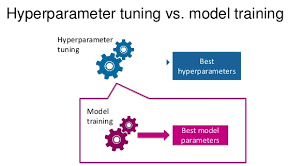

# Conclusion

Based on the results of the Linear Regression, Ridge Regression , Lasso Regression and ElasticNet Regression a conclusion can be made that Lasso Regression and ElasticNet Regression offer the best results.Increasing the size of the dataset could improve the algorithm`s perfomance on the test data.

# REFERENCES

https://www.kaggle.com/kumarajarshi/life-expectancy-who/data
    
https://github.com/alisaghilutfi/Life-Expectancy-Prediction/blob/master/Life-Expectancy-Prediction.ipynb

https://www.kdnuggets.com

    
    
